In [59]:
import seaborn as sns
import numpy as np
import pandas as pd
import math
import matplotlib.image as mpimg
import os
import time
import shutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [60]:
testDf = pd.read_csv('test.csv', error_bad_lines=False)
trainDf = pd.read_csv('train.csv', error_bad_lines=False)

b'Skipping line 1261: expected 1 fields, saw 2\nSkipping line 1529: expected 1 fields, saw 2\n'
b'Skipping line 4447: expected 1 fields, saw 2\nSkipping line 6988: expected 1 fields, saw 2\nSkipping line 10867: expected 1 fields, saw 2\nSkipping line 11155: expected 1 fields, saw 2\nSkipping line 13654: expected 1 fields, saw 2\nSkipping line 14698: expected 1 fields, saw 2\nSkipping line 14735: expected 1 fields, saw 2\nSkipping line 15866: expected 1 fields, saw 2\nSkipping line 19571: expected 1 fields, saw 3\nSkipping line 22482: expected 1 fields, saw 2\nSkipping line 25638: expected 1 fields, saw 2\nSkipping line 26897: expected 1 fields, saw 2\nSkipping line 28805: expected 1 fields, saw 2\nSkipping line 28951: expected 1 fields, saw 3\nSkipping line 32327: expected 1 fields, saw 2\nSkipping line 35574: expected 1 fields, saw 2\nSkipping line 37662: expected 1 fields, saw 2\nSkipping line 38151: expected 1 fields, saw 2\n'


In [61]:
labels = trainDf['imageid\tlabel\tproductname'].apply(lambda x: x.split('\t')[1]).unique()

folder_name = 'trainData'

# Check if the folder doesn't exist, then create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created successfully.")
else:
    print(f"Folder '{folder_name}' already exists.")

base_dir = os.path.expanduser(f'{folder_name}/')

# Create folders for each label category
for label in labels:
    label_dir = os.path.join(base_dir, label)
    os.makedirs(label_dir, exist_ok=True)

print("Folders created successfully.")

Folder 'trainData' already exists.
Folders created successfully.


In [62]:
labels = testDf['imageid\tlabel\tproductname'].apply(lambda x: x.split('\t')[1]).unique()

folder_name = 'testData'

# Check if the folder doesn't exist, then create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created successfully.")
else:
    print(f"Folder '{folder_name}' already exists.")

base_dir = os.path.expanduser(f'{folder_name}/')

# Create folders for each label category
for label in labels:
    label_dir = os.path.join(base_dir, label)
    os.makedirs(label_dir, exist_ok=True)

print("Folders created successfully.")

Folder 'testData' already exists.
Folders created successfully.


In [63]:
# image_folder = 'C:/Users/dunca/Downloads/archive/images/'

# # Iterate through the DataFrame rows and move images to corresponding label folders
# for index, row in trainDf.iterrows():
#     image_id, label, product = row['imageid\tlabel\tproductname'].split('\t')
#     image_id += ".jpg"
#     print(image_id)
#     source_path = os.path.join(image_folder, image_id)  # Assuming images are in 'images' folder
#     destination_folder = os.path.join('testdata/', label)     # Place images in corresponding label folders

#     # Create the destination folder if it doesn't exist
#     os.makedirs(destination_folder, exist_ok=True)

#     # Move the image file to the corresponding label folder
#     try:
#         shutil.copy(source_path, destination_folder)
#     except FileNotFoundError as g:
#         continue
# print("Images moved to corresponding label folders successfully.")

In [64]:
# image_folder = 'C:/Users/dunca/Downloads/archive/images/'

# # Iterate through the DataFrame rows and move images to corresponding label folders
# for index, row in testDf.iterrows():
#     image_id, label, product = row['imageid\tlabel\tproductname'].split('\t')
#     image_id += ".jpg"
#     print(image_id)
#     source_path = os.path.join(image_folder, image_id)  # Assuming images are in 'images' folder
#     destination_folder = os.path.join('testData/', label)     # Place images in corresponding label folders

#     # Create the destination folder if it doesn't exist
#     os.makedirs(destination_folder, exist_ok=True)

#     # Move the image file to the corresponding label folder
#     try:
#         shutil.copy(source_path, destination_folder)
#     except FileNotFoundError as g:
#         continue
# print("Images moved to corresponding label folders successfully.")

In [74]:
trainData = tf.keras.utils.image_dataset_from_directory('trainData')
train_data_iterator = trainData.as_numpy_iterator()

testData = tf.keras.utils.image_dataset_from_directory('testData')
test_data_iterator = testData.as_numpy_iterator()

Found 40422 files belonging to 13 classes.
Found 3998 files belonging to 13 classes.


In [76]:
train_batch = train_data_iterator.next()
print(train_batch[0].shape)

test_batch = test_data_iterator.next()
print(test_batch[0].shape)

(32, 256, 256, 3)
(32, 256, 256, 3)


In [78]:
print("Test Labels: ", train_batch[1])
print("Train Labels: ", test_batch[1])

Test Labels:  [ 7 12  0 12  9  9  4  2  0  5 10 10 11 10  7  0  2  1 10  0 10 10  4  4
  3  7  0 10  0  5  7  2]
Train Labels:  [ 8  7  0  9  9 10  1 10  7  0  9  7  5 10 10  7 10  1  0  3  7 12 10  7
 10  0  7 12  4 10  9 10]


0 = Bags,
1 = Bottomwear,
2 = Eyewear,
3 = Fragence,
4 = Innerwear,
5 = Jewellery,
6 = Makeup,
7 = Other,
8 = Sandal,
9 = Shoes,
10 = Topwear,
11 = Wallets,
12 = Watches

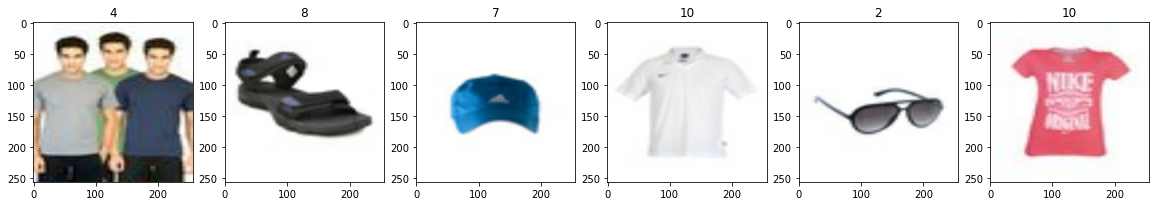

In [68]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

In [69]:
# Normalization / Optimize (Prolly move to 2nd Q)
# data = data.map(lambda x,y: (x/255, y)) 
# data.as_numpy_iterator().next()

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [71]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [72]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# hist = model.fit(data, epochs=20, callbacks=[tensorboard_callback])